# mnist-tensorfow

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

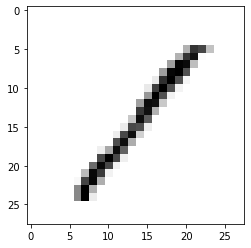

In [3]:
import matplotlib.pyplot as plt
import random
plt.imshow(random.choice(x_train),cmap = plt.cm.binary)

## Normalize data

In [4]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

## Build the Model

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax))

In [6]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [7]:
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4757 - accuracy: 0.8616
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1141 - accuracy: 0.9653
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0715 - accuracy: 0.9777


In [8]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(f'loss: {val_loss}, accuracy: {val_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0973 - accuracy: 0.9693
loss: 0.09725848585367203, accuracy: 0.9692999720573425


## Save the model

In [9]:
model.save('mnist-tf-model.h5')

## Predict a random number from the testing data

In [10]:
loaded_model = tf.keras.models.load_model('mnist-tf-model.h5')

In [11]:
random_idx = random.randint(0,len(x_test)-1)

In [12]:
predictions = loaded_model.predict([x_test])

In [13]:
predictions[random_idx]

array([5.4636467e-07, 1.1596034e-07, 1.5253447e-05, 8.1008039e-08,
       9.9994934e-01, 3.8223132e-07, 9.2609616e-06, 4.1891931e-06,
       1.8579500e-05, 2.3171510e-06], dtype=float32)

4

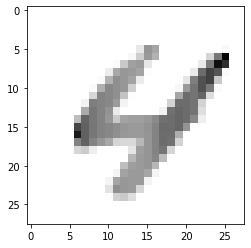

In [14]:
import numpy as np
plt.imshow(x_test[random_idx],cmap = plt.cm.binary)
np.argmax(predictions[random_idx])